In [138]:
# preamble to be able to run notebooks in Jupyter and Colab
try:
    from google.colab import drive
    import sys
    
    drive.mount('/content/drive')
    notes_home = "/content/drive/My Drive/CSC310/notes/"
    user_home = "/content/drive/My Drive/"
    sys.path.insert(1,notes_home) # let the notebook access the notes folder

except ModuleNotFoundError:
    notes_home = "" # running native Jupyter environment -- notes home is the same as the notebook
    user_home = ""  # under Jupyter we assume the user directory is the same as the notebook

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [139]:
import sys

if 'google.colab' in sys.modules:
  !pip install -q dtreeviz


In [140]:
import os 
os.chdir('/content/drive/My Drive/CSC310/notes/assets')

In [141]:
from dtreeviz.trees import *
from assets.treeviz import tree_print
from IPython.display import Image, display_svg, SVG
import pandas as pd

In [142]:
url = "https://raw.githubusercontent.com/Tranqpenguin/CSC310/main/c310/Guns.csv"

In [143]:
df = pd.read_csv(url)
df

,Unnamed: 0,year,violent,murder,robbery,prisoners,afam,cauc,male,population,income,density,state,law
0,1,1977,414.4,14.2,96.8,83,8.384873,55.12291,18.17441,3.780403,9563.148,0.074552,Alabama,no
1,2,1978,419.1,13.3,99.1,94,8.352101,55.14367,17.99408,3.831838,9932.000,0.075567,Alabama,no
2,3,1979,413.3,13.2,109.5,144,8.329575,55.13586,17.83934,3.866248,9877.028,0.076245,Alabama,no
3,4,1980,448.5,13.2,132.1,141,8.408386,54.91259,17.73420,3.900368,9541.428,0.076829,Alabama,no
4,5,1981,470.5,11.9,126.5,149,8.483435,54.92513,17.67372,3.918531,9548.351,0.077187,Alabama,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,1169,1995,254.2,2.1,17.9,254,1.485849,73.71621,15.37098,0.478447,14070.160,0.004927,Wyoming,yes
1169,1170,1996,249.7,3.3,20.4,289,1.521814,73.85796,15.44601,0.480085,14032.230,0.004944,Wyoming,yes
1170,1171,1997,255.2,3.5,17.7,310,1.527818,73.92731,15.49400,0.480031,14790.980,0.004943,Wyoming,yes
1171,1172,1998,247.6,4.8,16.2,326,1.558396,73.98515,15.51021,0.480045,15225.510,0.004944,Wyoming,yes


In [144]:
features_df = df.drop(['Unnamed: 0','state','law'],axis=1)# features
features_df.head()

,year,violent,murder,robbery,prisoners,afam,cauc,male,population,income,density
0,1977,414.4,14.2,96.8,83,8.384873,55.12291,18.17441,3.780403,9563.148,0.074552
1,1978,419.1,13.3,99.1,94,8.352101,55.14367,17.99408,3.831838,9932.000,0.075567
2,1979,413.3,13.2,109.5,144,8.329575,55.13586,17.83934,3.866248,9877.028,0.076245
3,1980,448.5,13.2,132.1,141,8.408386,54.91259,17.73420,3.900368,9541.428,0.076829
4,1981,470.5,11.9,126.5,149,8.483435,54.92513,17.67372,3.918531,9548.351,0.077187


In [145]:
target_df = pd.DataFrame(df['law']) # y_Train
target_df.head()

,law
0,no
1,no
2,no
3,no
4,no


In [146]:
dtree = tree.DecisionTreeClassifier(criterion='entropy')
dtree.fit(features_df,target_df)

DecisionTreeClassifier(criterion='entropy')

In [147]:
tree_print(dtree,features_df)

if cauc =< 72.5225601196289: 
  |then if year =< 1990.5: 
  |  |then if afam =< 3.7617709636688232: 
  |  |  |then if afam =< 2.6378999948501587: 
  |  |  |  |then if afam =< 0.6396433711051941: 
  |  |  |  |  |then if male =< 17.271470069885254: 
  |  |  |  |  |  |then yes
  |  |  |  |  |  |else no
  |  |  |  |  |else if robbery =< 9.549999713897705: 
  |  |  |  |  |  |then if year =< 1985.5: 
  |  |  |  |  |  |  |then no
  |  |  |  |  |  |  |else yes
  |  |  |  |  |  |else if prisoners =< 107.5: 
  |  |  |  |  |  |  |then no
  |  |  |  |  |  |  |else if male =< 17.645609855651855: 
  |  |  |  |  |  |  |  |then no
  |  |  |  |  |  |  |  |else if cauc =< 70.4636344909668: 
  |  |  |  |  |  |  |  |  |then yes
  |  |  |  |  |  |  |  |  |else no
  |  |  |  |else if robbery =< 146.1999969482422: 
  |  |  |  |  |then if population =< 3.8565415143966675: 
  |  |  |  |  |  |then if robbery =< 42.64999961853027: 
  |  |  |  |  |  |  |then yes
  |  |  |  |  |  |  |else no
  |  |  |  |  |  |else

In [148]:
predict_array = dtree.predict(features_df)      # produces an array of labels
predicted_labels = pd.DataFrame(predict_array)  # turn it into a DF
predicted_labels.columns = ['law'] 

In [149]:
predicted_labels.head()

,law
0,no
1,no
2,no
3,no
4,no


In [150]:
target_df.head()

,law
0,no
1,no
2,no
3,no
4,no


In [151]:
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 2)
dtree.fit(features_df,target_df)
tree_print(dtree,features_df)

if cauc =< 72.5225601196289: 
  |then if year =< 1990.5: 
  |  |then no
  |  |else no
  |else if density =< 0.004909250186756253: 
  |  |then no
  |  |else yes
<---->
Tree Depth:  2


In [152]:
target_df['law'].replace(["yes", "no"], [1,2], inplace=True)

In [153]:
import numpy as np
target_df= target_df.to_numpy()
target_df= target_df.flatten()
target_df

array([2, 2, 2, ..., 1, 1, 1])

In [154]:
dtree = tree.DecisionTreeClassifier(criterion='entropy')
dtree.fit(features_df,target_df)

DecisionTreeClassifier(criterion='entropy')

In [155]:
features_df.columns

Index(['year', 'violent', 'murder', 'robbery', 'prisoners', 'afam', 'cauc',
       'male', 'population', 'income', 'density'],
      dtype='object')

In [156]:
viz = dtreeviz(dtree, # The model we have just created
               features_df, # Training featues(dataframe)
               target_df,  # Target(1D numpy array)
               target_name='law',
               feature_names= features_df.columns, # Name of the features
               class_names= ["yes", "no"] # need class_names for classifier
              )  

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


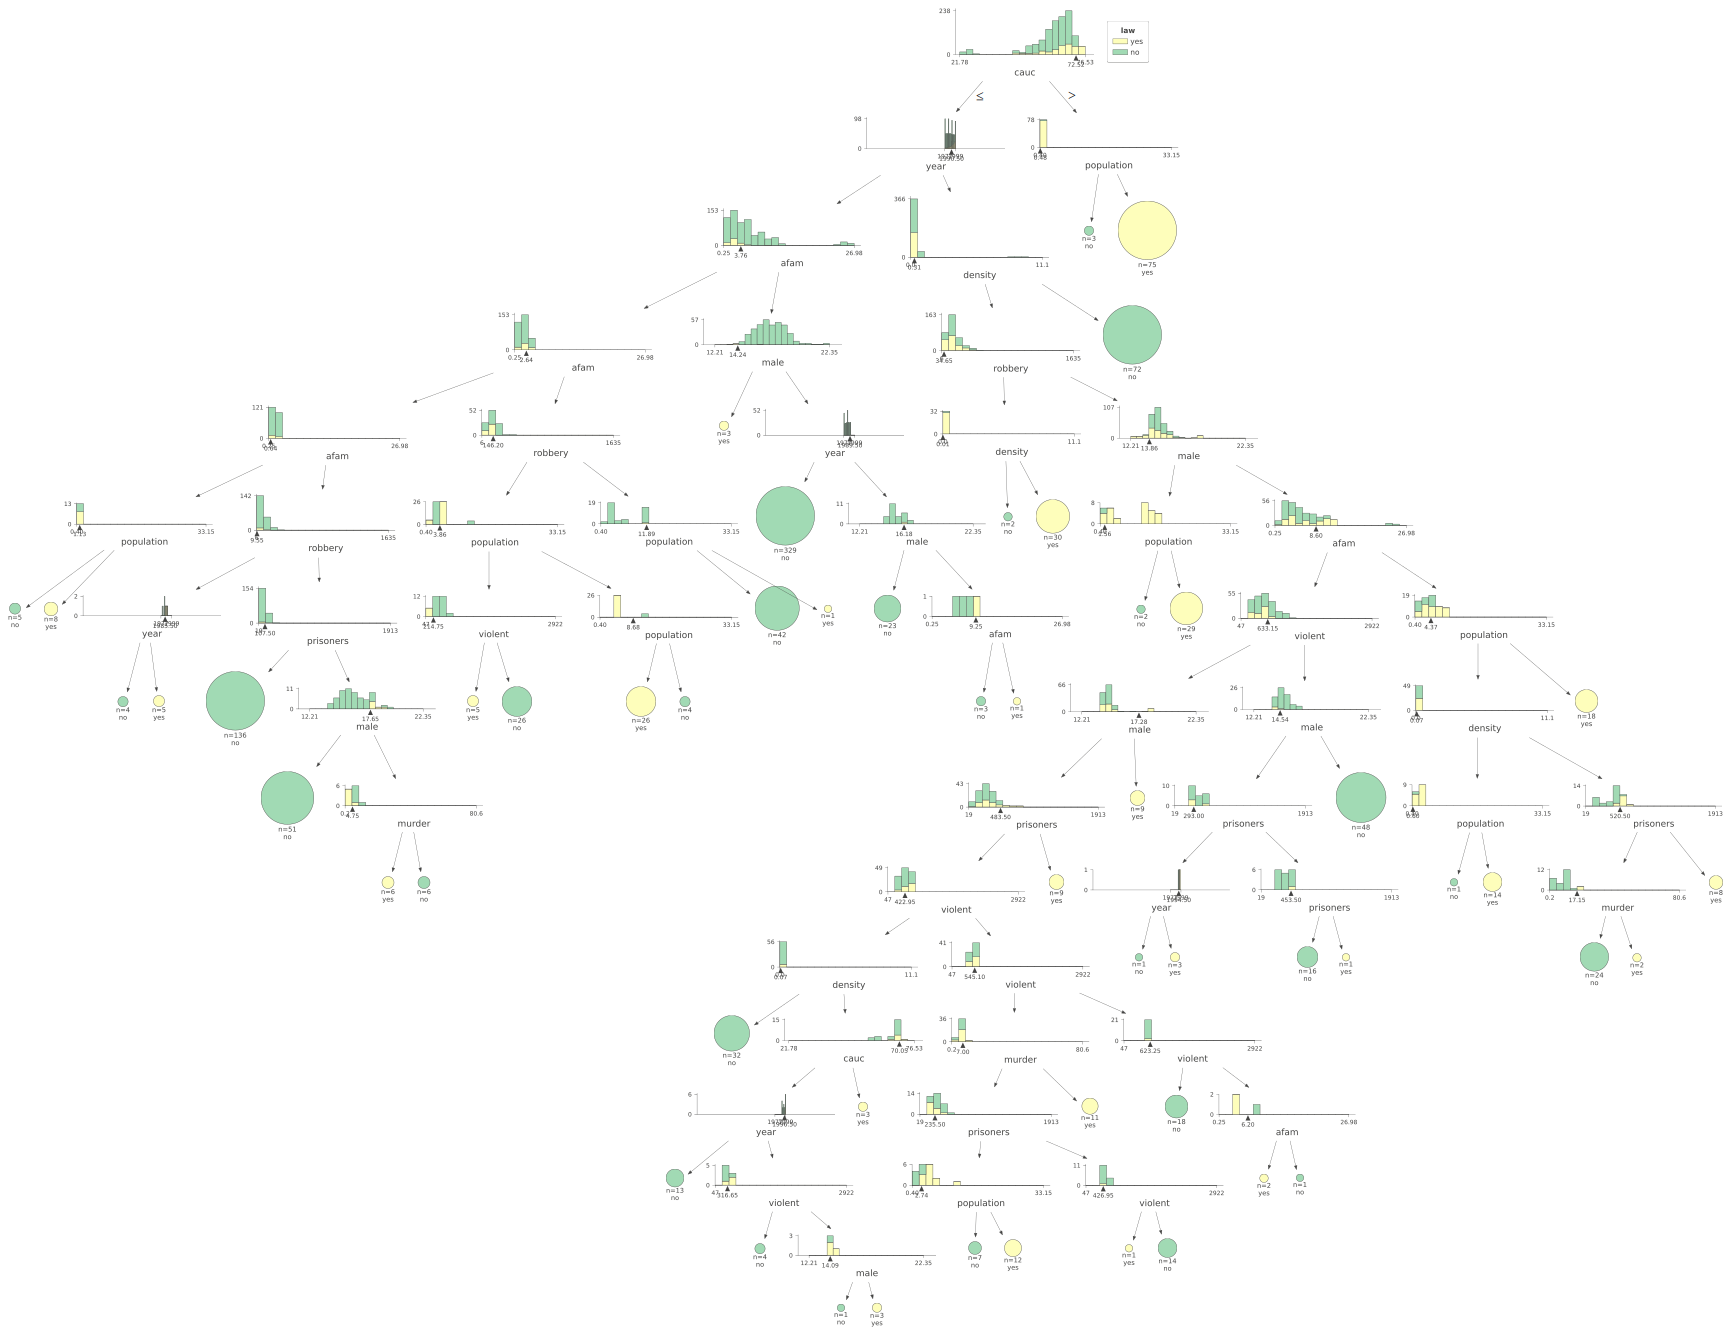

In [157]:
viz

In [158]:
from sklearn.metrics import accuracy_score
predicted_labels = dtree.predict(features_df)  #predicts a label for the features 

#Test for accuracy
print("Our model accuracy is: {}".format(accuracy_score(target_df, predicted_labels
                                                        )))

Our model accuracy is: 1.0


In [159]:
predicted_labels

array([2, 2, 2, ..., 1, 1, 1])

In [160]:
target_df

array([2, 2, 2, ..., 1, 1, 1])

In [161]:
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)
dtree.fit(features_df,target_df)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


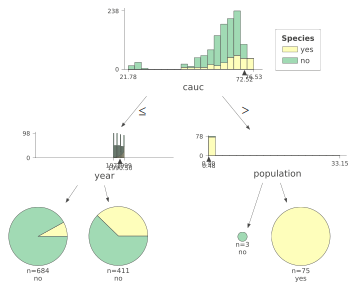

In [162]:
viz = dtreeviz(dtree, # The model we have just created
               features_df, # Training featues(dataframe)
               target_df,  # Target(1D numpy array)
               target_name='Species',
               feature_names=features_df.columns, # Name of the features
               class_names= ["yes", "no"] # need class_names for classifier
              )  
viz

In [163]:
predicted_labels = dtree.predict(features_df)  #predicts a label for the features 

#Test for accuracy
print("Our model accuracy is: {}".format(accuracy_score(target_df, predicted_labels
                                                        )))

Our model accuracy is: 0.8209718670076727
